# Régularité mensuelle TGV par liaisons

## https://data.sncf.com/explore/dataset/regularite-mensuelle-tgv-aqst/information/?sort=periode

In [33]:
import pandas
import numpy as np
fichier="regularite-mensuelle-tgv-aqst.csv"
import seaborn as sns
sns.set()
#df = pandas.read_csv(fichier,sep=";")
df=pandas.read_table(fichier,sep=";")
df.head(5)  #  afficher les 5 premières lignes

,Année,Mois,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet (min),Nombre de circulations prévues,Nombre de trains annulés,Commentaire (facultatif) annulations,Nombre de trains en retard au départ,...,Retard moyen trains en retard > 15min,Nombre trains en retard > 30min,Nombre trains en retard > 60min,Période,Retard pour causes externes,Retard à cause infrastructure ferroviaire,Retard à cause gestion trafic,Retard à cause matériel roulant,Retard à cause gestion en gare et réutilisation de matériel,Retard à cause prise en compte voyageurs
0,2018,3.0,NaN,STRASBOURG,PARIS EST,112.402439,505.0,13.0,NaN,250.0,...,5.754031,26.0,6.0,2018-03,37.662338,15.584416,19.480519,16.883117,6.493506,3.896104
1,2018,3.0,NaN,PARIS NORD,DUNKERQUE,120.996310,285.0,14.0,NaN,65.0,...,6.697417,19.0,7.0,2018-03,30.769231,17.948718,15.384615,33.333333,2.564103,0.000000
2,2018,3.0,NaN,LYON PART DIEU,PARIS LYON,120.549770,664.0,11.0,NaN,404.0,...,2.210031,12.0,1.0,2018-03,39.215686,5.882353,13.725490,23.529412,15.686275,1.960784
3,2018,3.0,NaN,PARIS LYON,GENEVE,194.005000,203.0,3.0,NaN,26.0,...,0.982500,4.0,0.0,2018-03,25.000000,15.000000,35.000000,10.000000,15.000000,0.000000
4,2018,8.0,NaN,LILLE,MARSEILLE ST CHARLES,309.389535,173.0,1.0,NaN,46.0,...,10.442151,13.0,6.0,2018-08,25.925926,7.407407,18.518519,29.629630,11.111111,7.407407


## noms des colonnes

In [12]:
df.columns

Index(['Année', 'Mois', 'Service', 'Gare de départ', 'Gare d'arrivée',
       'Durée moyenne du trajet (min)', 'Nombre de circulations prévues',
       'Nombre de trains annulés', 'Commentaire (facultatif) annulations',
       'Nombre de trains en retard au départ',
       'Retard moyen des trains en retard au départ (min)',
       'Retard moyen de tous les trains au départ (min)',
       'Commentaire (facultatif) retards au départ',
       'Nombre de trains en retard à l'arrivée',
       'Retard moyen des trains en retard à l'arrivée (min)',
       'Retard moyen de tous les trains à l'arrivée (min)',
       'Commentaire (facultatif) retards à l'arrivée',
       '% trains en retard pour causes externes (météo, obstacles, colis suspects, malveillance, mouvements sociaux, etc.)',
       '% trains en retard à cause infrastructure ferroviaire (maintenance, travaux)',
       '% trains en retard à cause gestion trafic (circulation sur ligne ferroviaire, interactions réseaux)',
       '% trai

## Ordonner les données par année et mois

In [13]:
df=df.sort_values(by=[df.columns[0] , df.columns[1]])
df.head(9)

,Année,Mois,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet (min),Nombre de circulations prévues,Nombre de trains annulés,Commentaire (facultatif) annulations,Nombre de trains en retard au départ,...,Retard moyen trains en retard > 15min,Nombre trains en retard > 30min,Nombre trains en retard > 60min,Période,Retard pour causes externes,Retard à cause infrastructure ferroviaire,Retard à cause gestion trafic,Retard à cause matériel roulant,Retard à cause gestion en gare et réutilisation de matériel,Retard à cause prise en compte voyageurs
334,2015,1.0,National,PARIS LYON,NIMES,177.905956,320.0,1.0,NaN,18.0,...,44.045455,12.0,6.0,2015-01,41.935484,19.354839,12.903226,9.677419,12.903226,3.225806
335,2015,1.0,National,PARIS EST,REIMS,47.173709,213.0,0.0,NaN,12.0,...,28.833333,2.0,0.0,2015-01,11.764706,17.647059,23.529412,23.529412,11.764706,11.764706
336,2015,1.0,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,192.349282,210.0,1.0,NaN,3.0,...,54.000000,5.0,4.0,2015-01,14.285714,71.428571,14.285714,0.000000,0.000000,0.000000
337,2015,1.0,National,PARIS MONTPARNASSE,VANNES,200.582386,177.0,1.0,NaN,3.0,...,25.666667,2.0,0.0,2015-01,44.444444,33.333333,11.111111,0.000000,11.111111,0.000000
338,2015,1.0,National,NANTES,STRASBOURG,327.038462,39.0,0.0,NaN,0.0,...,46.666667,3.0,0.0,2015-01,66.666667,0.000000,0.000000,33.333333,0.000000,0.000000
371,2015,1.0,National,PARIS MONTPARNASSE,TOURS,74.617143,175.0,0.0,NaN,3.0,...,45.000000,3.0,1.0,2015-01,22.222222,27.777778,11.111111,11.111111,16.666667,11.111111
372,2015,1.0,National,PARIS LYON,ANNECY,222.423567,159.0,2.0,NaN,3.0,...,55.100000,8.0,2.0,2015-01,60.000000,10.000000,20.000000,10.000000,0.000000,0.000000
373,2015,1.0,International,PARIS LYON,ITALIE,259.620690,87.0,0.0,NaN,4.0,...,28.384615,3.0,1.0,2015-01,4.597701,4.597701,0.000000,1.149425,0.000000,3.448276
374,2015,1.0,International,PARIS LYON,LAUSANNE,178.401709,117.0,0.0,NaN,9.0,...,39.300000,6.0,2.0,2015-01,NaN,NaN,NaN,NaN,NaN,NaN


## nombres d'occurences (Gare de départ)

### 1. par dictionnaire

In [14]:
Dic={}  #  dictionnaire
# dic['clé']=valeur
# clé de dictionnaire = Nom de Gare (axe) 
# valeur de dictionnaire = nombre d'observations

for x in df[df.columns[3]].values:
    Dic[x]=list(df[df.columns[3]].values).count(x)


## ordonner le dictionnaire par les clés
#import collections 
#Dic=collections.OrderedDict(sorted(Dic.items(), key=lambda t: t[0]))
Dic

{'PARIS LYON': 1439,
 'PARIS EST': 354,
 'LA ROCHELLE VILLE': 59,
 'PARIS MONTPARNASSE': 944,
 'NANTES': 130,
 'NANCY': 59,
 'LYON PART DIEU': 318,
 'MONTPELLIER': 118,
 'PARIS NORD': 236,
 'MULHOUSE VILLE': 59,
 'SAINT ETIENNE CHATEAUCREUX': 59,
 'TOULON': 59,
 'LE CREUSOT MONTCEAU MONTCHANIN': 59,
 'BREST': 59,
 'MARSEILLE ST CHARLES': 246,
 'ARRAS': 59,
 'AIX EN PROVENCE TGV': 59,
 'NICE VILLE': 59,
 'ST PIERRE DES CORPS': 59,
 'ST MALO': 59,
 'BESANCON FRANCHE COMTE TGV': 59,
 'RENNES': 130,
 'DIJON VILLE': 59,
 'CHAMBERY CHALLES LES EAUX': 59,
 'TOURS': 59,
 'LAUSANNE': 59,
 'STRASBOURG': 118,
 'DOUAI': 59,
 'GENEVE': 59,
 'STUTTGART': 59,
 'AVIGNON TGV': 59,
 'FRANCFORT': 59,
 'ZURICH': 59,
 'BELLEGARDE (AIN)': 59,
 'ANGERS SAINT LAUD': 59,
 'TOULOUSE MATABIAU': 59,
 'LILLE': 177,
 'MACON LOCHE': 59,
 'BORDEAUX ST JEAN': 94,
 'VALENCE ALIXAN TGV': 59,
 'METZ': 59,
 'LE MANS': 59,
 'DUNKERQUE': 59,
 'PERPIGNAN': 59,
 'ITALIE': 59,
 'REIMS': 59,
 'ANGOULEME': 59,
 'POITIERS': 59,
 

### 2. par le module pandas

In [15]:
df[df.columns[3]].value_counts()

PARIS LYON                        1439
PARIS MONTPARNASSE                 944
PARIS EST                          354
LYON PART DIEU                     318
MARSEILLE ST CHARLES               246
PARIS NORD                         236
LILLE                              177
RENNES                             130
NANTES                             130
STRASBOURG                         118
MONTPELLIER                        118
BORDEAUX ST JEAN                    94
NANCY                               59
CHAMBERY CHALLES LES EAUX           59
AIX EN PROVENCE TGV                 59
GRENOBLE                            59
TOULON                              59
POITIERS                            59
LE CREUSOT MONTCEAU MONTCHANIN      59
DIJON VILLE                         59
ANNECY                              59
METZ                                59
ANGERS SAINT LAUD                   59
BESANCON FRANCHE COMTE TGV          59
MULHOUSE VILLE                      59
ZURICH                   

In [6]:
# pour l'axe Paris EST
df[df['Gare de départ']=='PARIS EST']

,Année,Mois,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet (min),Nombre de circulations prévues,Nombre de trains annulés,Commentaire (facultatif) annulations,Nombre de trains en retard au départ,...,Retard moyen trains en retard > 15min,Nombre trains en retard > 30min,Nombre trains en retard > 60min,Période,Retard pour causes externes,Retard à cause infrastructure ferroviaire,Retard à cause gestion trafic,Retard à cause matériel roulant,Retard à cause gestion en gare et réutilisation de matériel,Retard à cause prise en compte voyageurs
335,2015,1.0,National,PARIS EST,REIMS,47.173709,213.0,0.0,NaN,12.0,...,28.833333,2.0,0.0,2015-01,11.764706,17.647059,23.529412,23.529412,11.764706,11.764706
2149,2015,1.0,National,PARIS EST,NANCY,93.383803,284.0,0.0,NaN,11.0,...,37.800000,6.0,1.0,2015-01,14.285714,64.285714,0.000000,14.285714,7.142857,0.000000
2986,2015,1.0,National,PARIS EST,STRASBOURG,141.681818,418.0,0.0,NaN,16.0,...,38.187500,7.0,4.0,2015-01,23.076923,42.307692,3.846154,11.538462,7.692308,11.538462
3420,2015,1.0,International,PARIS EST,STUTTGART,146.134259,108.0,0.0,NaN,6.0,...,40.125000,4.0,3.0,2015-01,NaN,NaN,NaN,NaN,NaN,NaN
4459,2015,1.0,National,PARIS EST,METZ,85.415584,231.0,0.0,NaN,8.0,...,24.600000,3.0,0.0,2015-01,4.761905,52.380952,14.285714,0.000000,14.285714,14.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6638,2019,11.0,NaN,PARIS EST,NANCY,95.712230,285.0,7.0,NaN,204.0,...,41.147619,7.0,2.0,2019-11,31.578947,31.578947,5.263158,26.315789,5.263158,0.000000
6703,2019,11.0,NaN,PARIS EST,REIMS,46.287129,208.0,6.0,NaN,161.0,...,33.283333,5.0,2.0,2019-11,25.000000,35.714286,14.285714,17.857143,7.142857,0.000000
6885,2019,11.0,NaN,PARIS EST,FRANCFORT,115.875000,172.0,4.0,NaN,98.0,...,45.997222,7.0,1.0,2019-11,11.111111,33.333333,11.111111,44.444444,0.000000,0.000000
6903,2019,11.0,NaN,PARIS EST,STRASBOURG,115.918447,525.0,10.0,NaN,361.0,...,34.212821,14.0,4.0,2019-11,23.076923,26.923077,7.692308,28.846154,9.615385,3.846154


## graphique  (Nombre de circulations prévues)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

Paris_Est=df[df['Gare de départ']=='PARIS EST']
Paris_Est.head(4)

,Année,Mois,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet (min),Nombre de circulations prévues,Nombre de trains annulés,Commentaire (facultatif) annulations,Nombre de trains en retard au départ,...,Retard moyen trains en retard > 15min,Nombre trains en retard > 30min,Nombre trains en retard > 60min,Période,Retard pour causes externes,Retard à cause infrastructure ferroviaire,Retard à cause gestion trafic,Retard à cause matériel roulant,Retard à cause gestion en gare et réutilisation de matériel,Retard à cause prise en compte voyageurs
9,2018,7.0,NaN,PARIS EST,STRASBOURG,113.211180,494.0,11.0,NaN,112.0,...,2.975155,16.0,5.0,2018-07,9.756098,21.951220,7.317073,39.024390,14.634146,7.317073
16,2019,3.0,NaN,PARIS EST,METZ,84.814935,312.0,4.0,NaN,49.0,...,3.732955,13.0,6.0,2019-03,3.225806,35.483871,16.129032,35.483871,9.677419,0.000000
40,2019,2.0,NaN,PARIS EST,METZ,84.712281,291.0,6.0,NaN,58.0,...,4.313567,16.0,4.0,2019-02,20.833333,20.833333,18.750000,25.000000,10.416667,4.166667
54,2019,5.0,NaN,PARIS EST,STUTTGART,179.601351,148.0,0.0,NaN,113.0,...,28.406667,5.0,0.0,2019-05,0.000000,14.285714,21.428571,42.857143,21.428571,0.000000


Paris  EST :  Nombre de circulations prévues


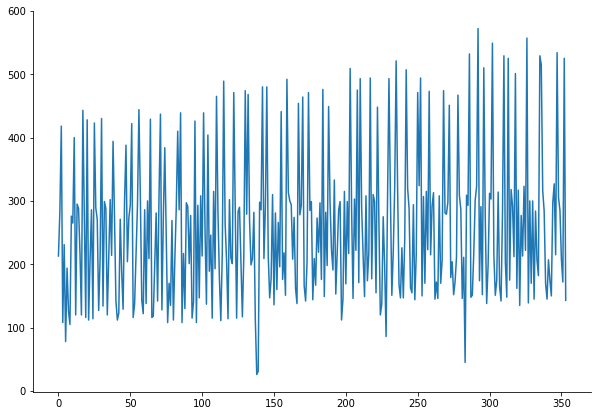

In [8]:
print("Paris  EST : ",Paris_Est.columns[6])

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
# cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

plt.plot(Paris_Est[Paris_Est.columns[6]].values)
plt.show()

## histogramme (Nombre de circulations prévues)

Paris  EST :  Nombre de circulations prévues


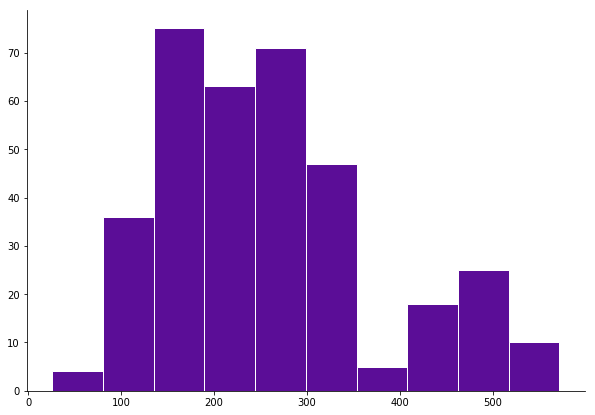

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

Paris_Est=df[df['Gare de départ']=='PARIS EST']

print("Paris  EST : ",Paris_Est.columns[6])

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

# cacher les cadres : haut , droit et gauche
ax1.spines['right'].set_visible(False)
#ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')
#ax1.set_yticks([])

plt.hist(Paris_Est[Paris_Est.columns[6]].values , ec="white",color=numpy.random.rand(3))
plt.show()

## graphique  (Nombre de trains annulés)

Paris  EST :  Nombre de trains annulés


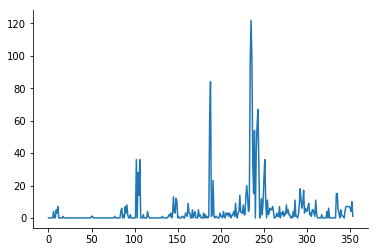

In [10]:
print("Paris  EST : ",Paris_Est.columns[7])

fig = plt.figure()
ax1 = fig.add_subplot(111)
# cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

plt.plot(Paris_Est[Paris_Est.columns[7]].values)
plt.show()

## histogramme (Nombre de trains annulés)

Paris  EST :  Nombre de trains annulés


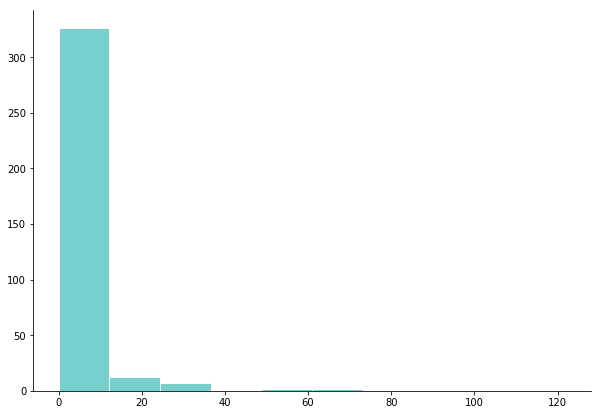

In [11]:
import numpy
print("Paris  EST : ",Paris_Est.columns[7])

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

# cacher les cadres : haut , droit et gauche
ax1.spines['right'].set_visible(False)
#ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')
#ax1.set_yticks([])

plt.hist(Paris_Est[Paris_Est.columns[7]].values , ec="white",color=numpy.random.rand(3))
plt.show()

## graphique  (Nombre de trains en retard au départ)

Paris  EST :  Nombre de trains en retard au départ


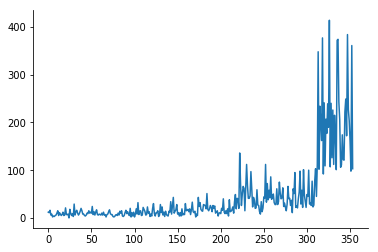

In [12]:
print("Paris  EST : ",Paris_Est.columns[9])

fig = plt.figure()
ax1 = fig.add_subplot(111)
# cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

plt.plot(Paris_Est[Paris_Est.columns[9]].values)
plt.show()

## histogramme (Nombre de trains en retard au départ)

Paris  EST :  Nombre de trains en retard au départ


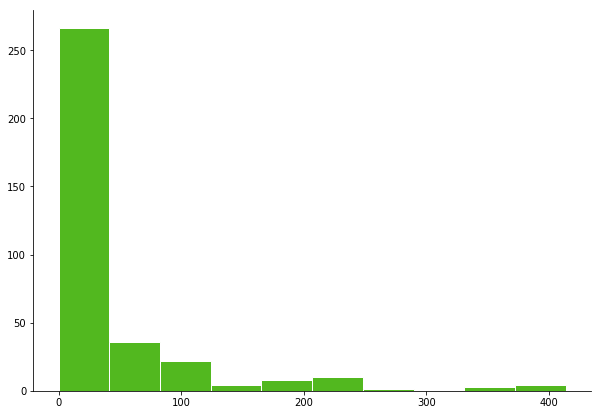

In [13]:
import numpy
print("Paris  EST : ",Paris_Est.columns[9])

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

# cacher les cadres : haut , droit et gauche
ax1.spines['right'].set_visible(False)
#ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')
#ax1.set_yticks([])

plt.hist(Paris_Est[Paris_Est.columns[9]].values , ec="white",color=numpy.random.rand(3))
plt.show()

## graphique  (Nombre de trains en retard à l'arrivée)

Paris  EST :  Nombre de trains en retard à l'arrivée


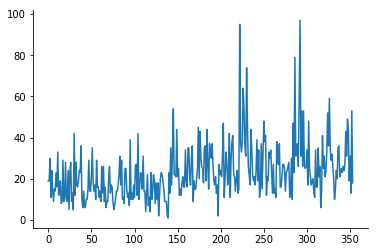

In [14]:
print("Paris  EST : ",Paris_Est.columns[13])

fig = plt.figure()
ax1 = fig.add_subplot(111)
# cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

plt.plot(Paris_Est[Paris_Est.columns[13]].values)
plt.show()

## histogramme (Nombre de trains en retard à l'arrivée)

Paris  EST :  Nombre de trains en retard à l'arrivée


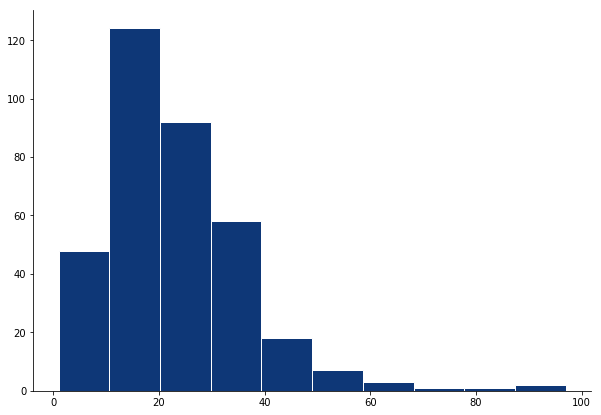

In [15]:
import numpy
print("Paris  EST : ",Paris_Est.columns[13])

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

# cacher les cadres : haut , droit et gauche
ax1.spines['right'].set_visible(False)
#ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')
#ax1.set_yticks([])

plt.hist(Paris_Est[Paris_Est.columns[13]].values , ec="white",color=numpy.random.rand(3))
plt.show()

## graphique  (Nombre trains en retard > 15min)

In [16]:
Paris_Est_1=Paris_Est[Paris_Est[Paris_Est.columns[23]].notnull()]  # supprimer les données manquantes

#Paris_Est_1[Paris_Est_1.columns[23]].values

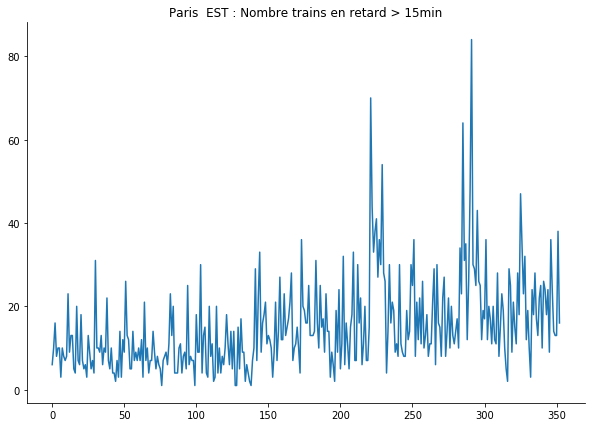

In [17]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
# cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

plt.plot(Paris_Est_1[Paris_Est_1.columns[23]].values)
plt.title("Paris  EST : {}".format(Paris_Est.columns[23]))
plt.show()

## histogramme  (Nombre trains en retard > 15min)

Paris  EST :  Nombre trains en retard > 15min


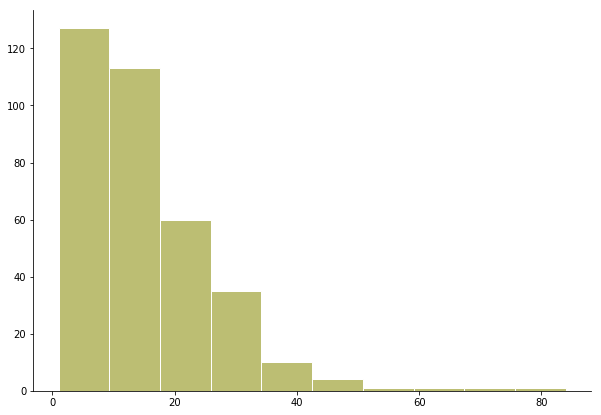

In [18]:
import numpy
print("Paris  EST : ",Paris_Est.columns[23])

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

# cacher les cadres : haut , droit et gauche
ax1.spines['right'].set_visible(False)
#ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')
#ax1.set_yticks([])

plt.hist(Paris_Est_1[Paris_Est_1.columns[23]].values , ec="white",color=numpy.random.rand(3))
plt.show()

## graphique  (Nombre trains en retard > 30min)

In [19]:
Paris_Est_2=Paris_Est[Paris_Est[Paris_Est.columns[25]].notnull()]  # supprimer les données manquantes

#Paris_Est_2[Paris_Est_2.columns[25]].values

Paris  EST :  Nombre trains en retard > 30min


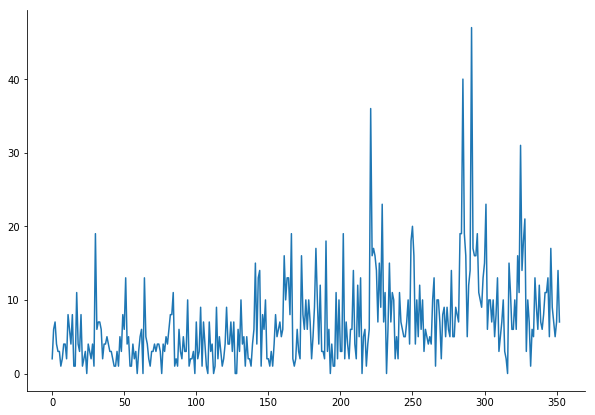

In [20]:
print("Paris  EST : ",Paris_Est.columns[25])

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
# cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

plt.plot(Paris_Est_2[Paris_Est_2.columns[25]].values)
plt.show()

## histogramme  (Nombre trains en retard > 30min)

Paris  EST :  Nombre trains en retard > 30min


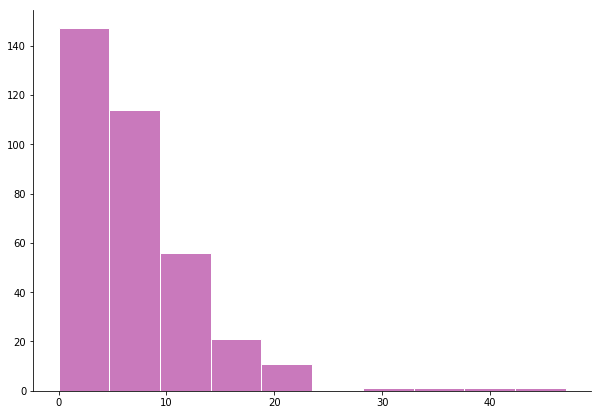

In [21]:
import numpy
print("Paris  EST : ",Paris_Est.columns[25])

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

# cacher les cadres : haut , droit et gauche
ax1.spines['right'].set_visible(False)
#ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')
#ax1.set_yticks([])

plt.hist(Paris_Est_2[Paris_Est_2.columns[25]].values , ec="white",color=numpy.random.rand(3))
plt.show()

## graphique  (Nombre trains en retard > 60min)

In [22]:
Paris_Est_3=Paris_Est[Paris_Est[Paris_Est.columns[26]].notnull()]  # supprimer les données manquantes

#Paris_Est_3[Paris_Est_3.columns[26]].values

Paris  EST :  Nombre trains en retard > 60min


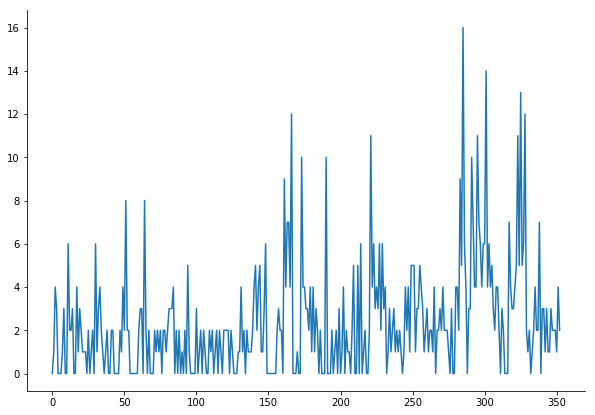

In [23]:
print("Paris  EST : ",Paris_Est.columns[26])

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
# cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

plt.plot(Paris_Est_3[Paris_Est_3.columns[26]].values)
plt.show()

## histogramme  (Nombre trains en retard > 60min)

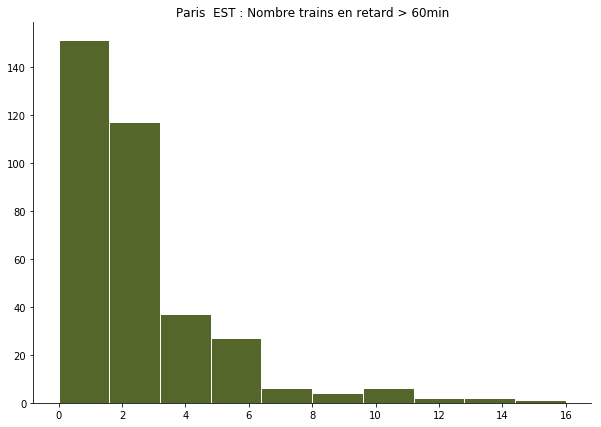

In [24]:
import numpy
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

# cacher les cadres : haut , droit et gauche
ax1.spines['right'].set_visible(False)
#ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')
#ax1.set_yticks([])

plt.hist(Paris_Est_3[Paris_Est_3.columns[26]].values , ec="white",color=numpy.random.rand(3))
plt.title("Paris  EST : {}".format(Paris_Est.columns[26]))
plt.show()

## Vraissemblance nb circulation prévue (col. 6)

In [25]:
import math
import numpy as np
import scipy

df.head(5)

,Année,Mois,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet (min),Nombre de circulations prévues,Nombre de trains annulés,Commentaire (facultatif) annulations,Nombre de trains en retard au départ,...,Retard moyen trains en retard > 15min,Nombre trains en retard > 30min,Nombre trains en retard > 60min,Période,Retard pour causes externes,Retard à cause infrastructure ferroviaire,Retard à cause gestion trafic,Retard à cause matériel roulant,Retard à cause gestion en gare et réutilisation de matériel,Retard à cause prise en compte voyageurs
334,2015,1.0,National,PARIS LYON,NIMES,177.905956,320.0,1.0,NaN,18.0,...,44.045455,12.0,6.0,2015-01,41.935484,19.354839,12.903226,9.677419,12.903226,3.225806
335,2015,1.0,National,PARIS EST,REIMS,47.173709,213.0,0.0,NaN,12.0,...,28.833333,2.0,0.0,2015-01,11.764706,17.647059,23.529412,23.529412,11.764706,11.764706
336,2015,1.0,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,192.349282,210.0,1.0,NaN,3.0,...,54.000000,5.0,4.0,2015-01,14.285714,71.428571,14.285714,0.000000,0.000000,0.000000
337,2015,1.0,National,PARIS MONTPARNASSE,VANNES,200.582386,177.0,1.0,NaN,3.0,...,25.666667,2.0,0.0,2015-01,44.444444,33.333333,11.111111,0.000000,11.111111,0.000000
338,2015,1.0,National,NANTES,STRASBOURG,327.038462,39.0,0.0,NaN,0.0,...,46.666667,3.0,0.0,2015-01,66.666667,0.000000,0.000000,33.333333,0.000000,0.000000


df:  Nombre de circulations prévues


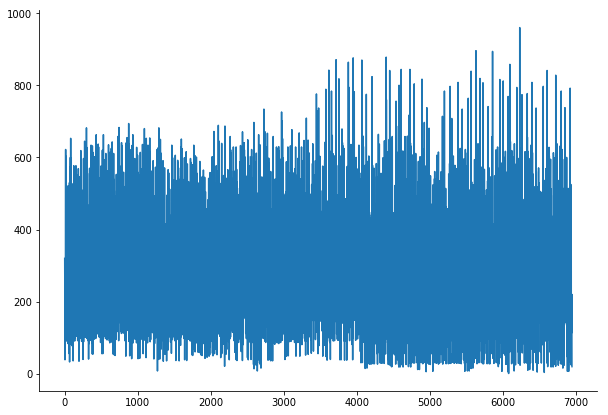

In [26]:
print("df: ",df.columns[6])

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
# cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

plt.plot(df[df.columns[6]].values)
plt.show()

In [34]:
from scipy.stats import moment
import scipy

def melange_gaussien(loi1,loi2,p1,p2):
    res = []
    for i in range(len(loi1)):
        res.append(p1*loi1[i]+p2*loi2[i])
    return res

def normal(x, mu_, sigma_):
    return (1/np.sqrt(2*np.pi*sigma_**2)) * np.exp(-1/2 * (x-mu_)**2/sigma_**2)


def Epsilon(S1,S2,a):
    m = len(S1)
    n = len(S2)
    
    distances = np.eye(m,n)
    distances2 = np.eye(m)
    distances3 = np.eye(n)
    
    for i in range(m):
        for i2 in range(m):
            if(i<=i2):
                distances2[i,i2] = abs(S1[i] - S1[i2])**a   
            else:
                distances2[i,i2] = 0
            
        for j in range(n):
            distances[i,j] = abs(S1[i] - S2[j])**a
            if(i==0):
                for j2 in range(n):
                    if(j<=j2):
                        distances3[j,j2] = abs(S2[j] - S2[j2])**a
                    else:
                        distances3[j,j2] = 0
            
    
    return((2/(n*m)) * np.sum(distances) - (scipy.special.comb(n,2)**-1)*(np.sum(distances2)) - (scipy.special.comb(m,2)**-1)*(np.sum(distances3)))

    
def Q(S1,S2,a):
    m = len(S1)
    n = len(S2)
    return(Epsilon(S1,S2,a)*(m*n)/(n+m))


#Pour obtenir une unique rupture
def rupture(X):
    stat_0 = []
    stat_1 = []
    stat_2 = []
    n = len(X)
    for k in range(2,n-2):
        S1 = X[0:k]
        S2 = X[k:n]
        n1 = len(S1)
        n2 = len(S2)
        if(n1 >= 2 and n2 >= 2):
            stat_0.append(Q(S1,S2,0))
            stat_1.append(Q(S1,S2,1))
            stat_2.append(Q(S1,S2,2))
            
            
    kmax_0 = None
    kmax_1 = None
    kmax_2 = None
    
    
    
    
    if(len(stat_0) != 0):
        kmax_0 = (np.where(stat_0 == max(stat_0))[0])[0] + 2
    if(len(stat_1) != 0):
        kmax_1 = (np.where(stat_1 == max(stat_1))[0])[0] + 2
    if(len(stat_2) != 0):
        kmax_2 = (np.where(stat_2 == max(stat_2))[0])[0] + 2
    
    
    
    return(kmax_0, kmax_1, kmax_2)


#Pour obtenir plusieurs ruptures
# fonction recursive : res représente les ruptures
def ruptures(X, m, res,a):
    
    res = sorted(res)
    n = len(X)
    List_X = []
    if(m == 0):
        return(list(set(res)))
    else:  
        for k in range(len(res)) :
            if(k == 0):
                List_X.append(X[0:res[k]])
            else:
                List_X.append(X[res[k-1]:res[k]])
        

        if(len(List_X)==0):
            r1 = rupture(X)[a]
            res.append(r1)
        else:
            for x in List_X:
                r_x = rupture(x)[a]
                if(len(x) >= 2 and r_x != None):
                    res.append(r_x)
            
        res = ruptures(X, m-1, res,a)
        return(sorted(list(set(res))))
    
    

In [59]:
def Etat(gare,nom, colonne):
    rupt = rupture(gare[colonne].to_numpy())
    rupts_0 = ruptures(gare[colonne].to_numpy(),2,[],0)
    #rupts_1 = ruptures(gare[colonne].to_numpy(),2,[],1)
    #rupts_2 = ruptures(gare[colonne].to_numpy(),2,[],2)
    print("rupts_0",rupts_0)
    #print("rupts_1",rupts_1)
    #print("rupts_2",rupts_2)
    #P1 = [normal(j,rupt[1],rupt[3]) for j in range(int(max(gare[colonne].values)+1))]
    #P2 = [normal(j,rupt[2],rupt[3]) for j in range(int(max(gare[colonne].values)+1))]
    print(rupt)
    print(gare[colonne].shape[0])
    p1 = rupt[0]/gare[colonne].shape[0]
    print('p1:{}'.format(p1))
    p2 = 1 - p1
    print('p2:{}'.format(p2))
    
    print("k_rupture = ", rupt[0])
    print(nom, " : ", colonne)
    fig = plt.figure(figsize=(10,7))
    ax1 = fig.add_subplot(111)
    # cacher les cadres : haut et droit
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)


    ax1.xaxis.set_ticks_position('bottom')

    l1 = [k for k in range(rupt[0])]
    l2 = [k for k in range(rupt[0],len(gare[colonne].values))]
    
    #plt.plot(l1,gare[colonne].values[:rupt[0]], color = 'green')
    #plt.plot(l2,gare[colonne].values[rupt[0]:], color = 'blue')
    #plt.axvline(x=rupt[0],color='red')
    
    nr = len(rupts_0)
    for r in range(nr):
        if(r%2 == 0):
            col='green'
            col2='blue'
        else:
            col='blue'
            col2='green'
        
        if(r == 0):
            l1 = [k for k in range(rupts_0[r])]
            plt.plot(l1,gare[colonne].values[:rupts_0[0]], color = col)
            plt.axvline(x=rupts_0[0],color='red')
        elif(r == nr-1):
            l1 = [k for k in range(rupts_0[r-1],rupts_0[r])]
            l2 = [k for k in range(rupts_0[r],len(gare[colonne].values))]
            
            plt.plot(l1,gare[colonne].values[rupts_0[r-1]:rupts_0[r]], color = col)
            plt.plot(l2,gare[colonne].values[rupts_0[r]:], color = col2)
            plt.axvline(x=rupts_0[r],color='red')
        else:
            l1 = [k for k in range(rupts_0[r-1],rupts_0[r])]
            plt.plot(l1,gare[colonne].values[rupts_0[r-1]:rupts_0[r]], color = col2)
            plt.axvline(x=rupts_0[r],color='red')
    
    
    plt.show()

    print(nom, " : ", colonne)
    #fig = plt.figure(figsize=(10,7))
    ax1 = fig.add_subplot(111)

    # cacher les cadres : haut , droit et gauche
    ax1.spines['right'].set_visible(False)
    #ax1.spines['left'].set_visible(False)
    ax1.spines['top'].set_visible(False)


    ax1.xaxis.set_ticks_position('bottom')
    #ax1.set_yticks([])
    
    result2 = rupts_0
    #plt.hist(gare[colonne].values,color=np.random.rand(3),density =True)
    data2 = gare[colonne].values
    m1 = np.mean(data2[:result2[0]])
    print(m1)
    m2 = np.mean(data2[result2[0]:])
    print(m2)
    sig = np.std(data2)
    print(sig)

    def normal(x, mu_, sigma_):
        return (1/np.sqrt(2*np.pi*sigma_**2)) * np.exp(-1/2 * (x-mu_)**2/sigma_**2)
    plt.figure(figsize=(10,7))
    x = np.linspace(0,max(data2),10000)
    plt.hist(data2,density=True,bins=30)
    plt.plot(x,normal(x,m1,sig))
    plt.plot(x,normal(x,m2,sig))
    #plt.plot(P1,color='g')
    #plt.plot(P2,color='b')
    #plt.plot(p1*np.array(P1)+p2*np.array(P2), color ='r')
    plt.show()

In [60]:
def etat_gare(gare,nom):
    #gare_1=df[df['Gare de départ']=='PARIS EST']
    Etat(gare,nom,'Nombre de circulations prévues')
    Etat(gare,nom,'Nombre de trains annulés')


In [61]:
Paris_Lyon=df[df['Gare de départ']=='PARIS LYON']
Paris_PD=df[df['Gare de départ']=='LYON PART DIEU']
print(len(Paris_Lyon))
print(len(Paris_Est))
print(len(Paris_PD))

1439
354
318


rupts_0 [14, 29]
(29, 29, 26)
59
p1:0.4915254237288136
p2:0.5084745762711864
k_rupture =  29
PARIS EST  :  Nombre de circulations prévues


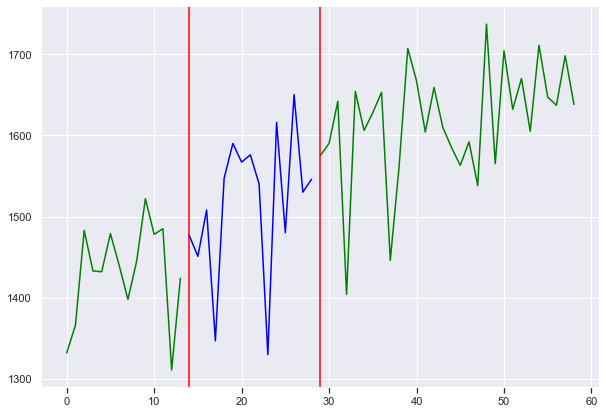

PARIS EST  :  Nombre de circulations prévues
1430.5714285714287
1584.0666666666666
106.22118954745686


/Users/nicolasmakaroff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


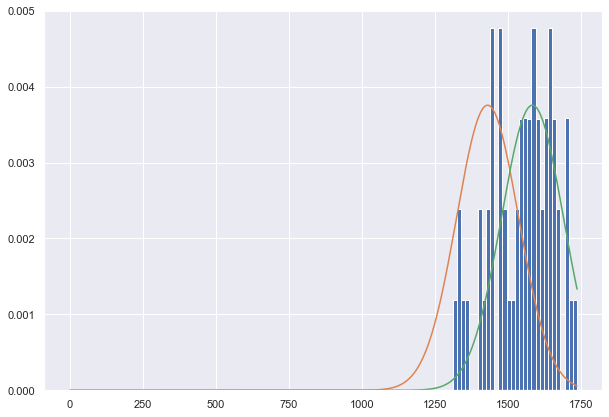

rupts_0 [14, 29]
(29, 31, 38)
59
p1:0.4915254237288136
p2:0.5084745762711864
k_rupture =  29
PARIS EST  :  Nombre de trains annulés


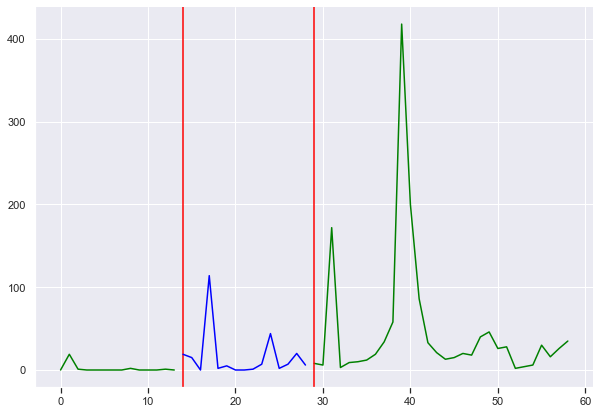

PARIS EST  :  Nombre de trains annulés
1.6428571428571428
36.8
63.32973222902449


/Users/nicolasmakaroff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


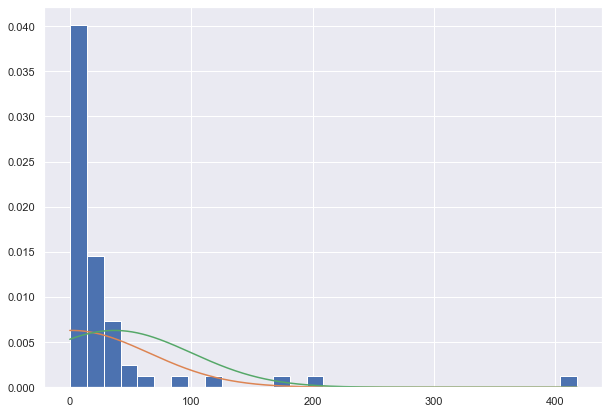

In [62]:
gare=df[df['Gare de départ']=='PARIS EST']
gare=gare.sort_values(by=[gare.columns[0],gare.columns[1]])
gare=gare[['Année','Mois','Gare de départ','Nombre de circulations prévues','Nombre de trains annulés']]
d1 = gare.groupby(['Année','Mois'])['Nombre de trains annulés'].sum().to_numpy()
d2 = gare.groupby(['Année','Mois'])['Nombre de circulations prévues'].sum().to_numpy()

dd=list(zip(d1,d2))

test=pandas.DataFrame(dd,columns=['Nombre de trains annulés','Nombre de circulations prévues'])
test.head()
etat_gare(test,'PARIS EST')


array(2)